# INPUT-OUTPUT RELATIONS IN THE PATHWAY OF RECURRENT INHIBITION TO MOTONEURONES IN THE CAT
Intracellular recording from one RC impaled with microelectrodes and injected with depolirizing step currents of constant, but varied strength. Pulse duration of approximately 90ms in cat spinal cord.

Parameters adjusted:
* 

In [6]:
import os, sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time

from Configuration import Configuration
from InterneuronPoolOpt import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [10]:
def simulator(numberRC, duration, current, newParametrization, finalParametrization, res):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = duration
    
    if not newParametrization:
        # Parameters from java
        ## Threshold (makes a rheobase of 0.5 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 0.1724138
        conf.confArray['f2'][idx] = 0.1724138
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        if finalParametrization:
            # Threshold (makes a rheobase of 0.5 nA for chosen Rm)
            idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 0.6
            conf.confArray['f2'][idx] = 0.6

            # Ks
            idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
            conf.confArray['f1'][idx] = 1100
            idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
            conf.confArray['f1'][idx] = 0.015
            
            ## Morphology
            idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 27
            conf.confArray['f2'][idx] = 27
            idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 218
            conf.confArray['f2'][idx] = 218
            idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 221.897
            conf.confArray['f2'][idx] = 221.897
    else:
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        if finalParametrization:
            # Threshold (makes a rheobase of 0.5 nA)
            idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
            conf.confArray['f1'][idx] = 0.1724138
            conf.confArray['f2'][idx] = 0.1724138

            # Ks
            idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
            conf.confArray['f1'][idx] = 1100
            idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
            conf.confArray['f1'][idx] = 0.015
            
            # Refractory period
            idx = np.where(conf.confArray['f0']=='RC_extSomaRefPer')[0][0]
            conf.confArray['f1'][idx] = 2.0
    
    pools = dict()
    pools[0] = InterneuronPool(conf, 'RC', 'ext')

    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    RC_mV = np.zeros_like(t)
    for i in xrange(0, len(t)):
        if t[i]>10 and t[i]<190:
            for j in xrange(len(pools[0].unit)):
                pools[0].iInjected[j] = current
        else:
            for j in xrange(len(pools[0].unit)):
                pools[0].iInjected[j] = 0
        #pools[1].atualizePool(t[i]) # RC synaptic Noise
        pools[0].atualizeInterneuronPool(t[i]) # RC pool
        RC_mV[i] = pools[0].v_mV[0]

    pools[0].listSpikes()
    
    intervals = 3
    FiringRate_pps = []
    if len(pools[0].poolSomaSpikes[:, 0]) != 0:
    # if the RC did fired
        for i in xrange(intervals):
            FiringRate_pps.append(1000/(pools[0].poolSomaSpikes[:, 0][i+1]-
                                           pools[0].poolSomaSpikes[:, 0][i])
                             )
    
        SteadyState = [x for x in pools[0].poolSomaSpikes[:, 0] if x>80]
        auxSteadyState = []
        for i in xrange(len(SteadyState)-1):
            auxSteadyState.append(1000/(SteadyState[i+1]-SteadyState[i]))
        FiringRate_pps.append(sum(auxSteadyState) / float(len(auxSteadyState)))

        #instFiring = 0
        #instFiring = np.zeros([1, len(pools[0].poolSomaSpikes[:, 0])-1], dtype=float)
        #factor = np.zeros_like(instFiring)
        #for i in xrange(1, len(pools[0].poolSomaSpikes[:, 0])):
        #    instFiring[0][i-1] = 2000/(pools[0].poolSomaSpikes[:, 0][i]-
        #                               pools[0].poolSomaSpikes[:, 0][i-1])
            
        #plt.figure()
        #plt.plot(instFiring[0], '.')
        #plt.show()
        
    else:
        FiringRate_pps = [0, 0, 0, 0]

    return FiringRate_pps, RC_mV

<IPython.core.display.Javascript object>


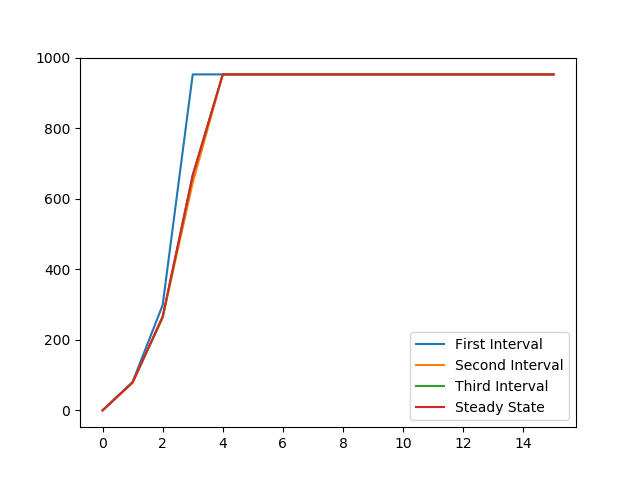

<IPython.core.display.Javascript object>


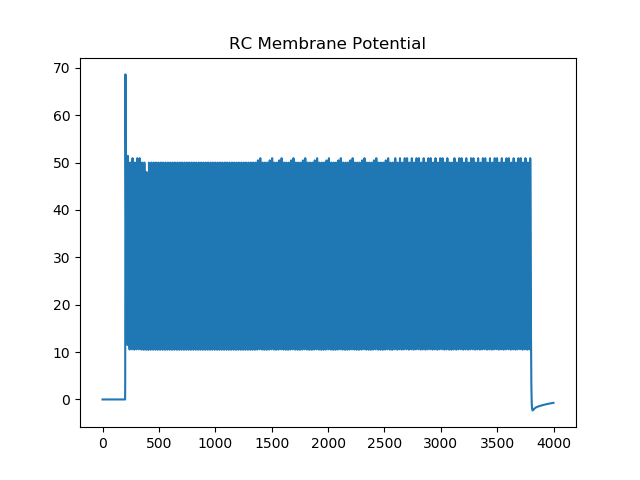

In [11]:
sys.stdout = open(os.devnull, 'w')

nRC = 1
t = 200
newParams = False
finalParams = True
res = [200]#range(200,1000,200)

for j in res:
    first = []
    second = []
    third = []
    fourth = []
    for i in xrange(0, 16):
        FR, RCMembrane = simulator(nRC, t, i, newParams, finalParams, j)
        #FR = simulator(nRC, t, i, newParams, finalParams, j)
        first.append(FR[0])
        second.append(FR[1])
        third.append(FR[2])
        fourth.append(FR[3])
    plt.figure()
    plt.plot(first, label='First Interval')
    plt.plot(second, label='Second Interval')
    plt.plot(third, label='Third Interval')
    plt.plot(fourth, label='Steady State')
    plt.legend()
    plt.figure()
    plt.plot(RCMembrane)
    plt.title('RC Membrane Potential')
    plt.show()

sys.stdout = sys.__stdout__

In [20]:
for i in np.arange(0,16,0.5):
    print i